<a href="https://colab.research.google.com/github/jv-mendes07/indice_de_liberdade_economica/blob/main/EDA_%C3%8Dndice_de_Liberdade_Econ%C3%B4mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de Dados
## Índice De Liberdade Econômica

#### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xlrd --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
df = pd.read_excel('/content/drive/MyDrive/index2022_data.xls')

In [4]:
df.shape

(184, 37)

In [5]:
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Unnamed: 27,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,Afghanistan,38.928341,78.729,-5.000,0.9824,2390.024,11.73,5.607,13.0,7.785
1,2,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.606077,...,Albania,2.837743,40.737,-3.500,1.9856,14218.106,11.70,1.603,1107.0,75.960
2,3,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.098833,...,Algeria,43.851043,491.459,-5.992,0.1016,11112.187,12.83,2.415,1125.0,53.067
3,4,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.633745,...,Angola,32.866268,215.105,-3.975,-1.8610,6931.862,7.70,22.277,-1866.0,127.115
4,5,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.055133,...,Argentina,45.376763,941.848,-9.956,-2.7740,20750.990,11.67,42.015,4123.0,102.998


#### Tratamento dos dados

In [6]:
df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2022 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Unnamed: 20', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP', 'Unnamed: 24',
       'Gov't Expenditure % of GDP ', 'Country', 'Unnamed: 27',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [7]:
df.rename(columns = {
    'CountryID': 'pais_id',
    'Country Name': 'pais',
    'WEBNAME': 'webname',
    'Region': 'regiao',
    'World Rank': 'ranking_mundial',
    'Region Rank': 'ranking_regional',
    '2022 Score': 'pontuacao_2022',
    'Property Rights': 'direitos_de_propriedade',
    'Judical Effectiveness': 'eficiencia_juridica',
    'Government Integrity': 'integridade_governamental',
    'Tax Burden': 'carga_tributaria',
    "Gov't Spending": 'gastos_do_governo',
     'Fiscal Health': 'saude_fiscal',
     'Business Freedom': 'liberdade_de_negocios',
     'Labor Freedom': 'liberdade_de_trabalho',
     'Monetary Freedom': 'liberdade_monetaria',
     'Trade Freedom': 'liberdade_comercial',
     'Investment Freedom ': 'liberdade_de_investimento',
     'Financial Freedom': 'liberdade_financeira',
     'Tariff Rate (%)': 'taxa_tarifaria',
     'Unnamed: 20': 'sem_nome',
     'Income Tax Rate (%)': 'taxa_imposto_de_renda',
     'Corporate Tax Rate (%)': 'taxa_de_imposto_corporativo',
     'Tax Burden % of GDP': '%_carga_tributacao_pib',
     'Unnamed: 24': 'sem_nome_2',
     "Gov't Expenditure % of GDP ": '%_despesas_gov_do_pib',
      'Country': 'pais_2',
      'Unnamed: 27': 'sem_nome_3',
      'Population (Millions)': 'populacao_milhoes',
      'GDP (Billions, PPP)': 'pib_bilhoes_per_capita',
      'GDP Growth Rate (%)': '%_crescimento_pib',
      '5 Year GDP Growth Rate (%)': '%_crescimento_pib_em_cinco_anos',
      'GDP per Capita (PPP)': 'pib_per_capita',
      'Unemployment (%)': '%_de_desemprego',
      'Inflation (%)': '%_de_inflacao',
      'FDI Inflow (Millions)': 'entrade_de_ide_milhoes',
      'Public Debt (% of GDP)': '%_divida_publica_pib'
}, inplace = True)

In [8]:
df.columns

Index(['pais_id', 'pais', 'webname', 'regiao', 'ranking_mundial',
       'ranking_regional', 'pontuacao_2022', 'direitos_de_propriedade',
       'eficiencia_juridica', 'integridade_governamental', 'carga_tributaria',
       'gastos_do_governo', 'saude_fiscal', 'liberdade_de_negocios',
       'liberdade_de_trabalho', 'liberdade_monetaria', 'liberdade_comercial',
       'liberdade_de_investimento', 'liberdade_financeira', 'taxa_tarifaria',
       'sem_nome', 'taxa_imposto_de_renda', 'taxa_de_imposto_corporativo',
       '%_carga_tributacao_pib', 'sem_nome_2', '%_despesas_gov_do_pib',
       'pais_2', 'sem_nome_3', 'populacao_milhoes', 'pib_bilhoes_per_capita',
       '%_crescimento_pib', '%_crescimento_pib_em_cinco_anos',
       'pib_per_capita', '%_de_desemprego', '%_de_inflacao',
       'entrade_de_ide_milhoes', '%_divida_publica_pib'],
      dtype='object')

In [9]:
df.set_index('pais_id', inplace = True)

In [10]:
df.drop(columns = ['webname', 'sem_nome_2', 
                   'pais_2', 'sem_nome_3'], inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 183
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pais                             184 non-null    object 
 1   regiao                           184 non-null    object 
 2   ranking_mundial                  177 non-null    float64
 3   ranking_regional                 177 non-null    float64
 4   pontuacao_2022                   177 non-null    float64
 5   direitos_de_propriedade          177 non-null    float64
 6   eficiencia_juridica              177 non-null    float64
 7   integridade_governamental        177 non-null    float64
 8   carga_tributaria                 177 non-null    float64
 9   gastos_do_governo                177 non-null    float64
 10  saude_fiscal                     177 non-null    float64
 11  liberdade_de_negocios            177 non-null    float64
 12  liberdade_de_trabalho 

#### (1) Quantos países foram avaliados pelo Índice de Liberdade Econômica?

In [12]:
df.pais.nunique()

184

In [13]:
df.groupby('regiao').agg({
    'pais': 'size'
})

,pais
regiao,
Americas,32
Asia-Pacific,40
Europe,46
Middle East and North Africa,18
Sub-Saharan Africa,48


In [14]:
array_1 = df.groupby('regiao').agg({
    'pais': 'size'
}).pais.to_numpy()

In [15]:
array_1

array([32, 40, 46, 18, 48])

In [16]:
(df.groupby('regiao').agg({
    'pais': 'size'}).pais / df.pais.nunique() * 100).round(2)

regiao
Americas                        17.39
Asia-Pacific                    21.74
Europe                          25.00
Middle East and North Africa     9.78
Sub-Saharan Africa              26.09
Name: pais, dtype: float64

In [17]:
df.groupby('regiao').agg({
    'pais': 'size'
}).sort_values('pais', ascending = False).reset_index().regiao.to_numpy()

array(['Sub-Saharan Africa', 'Europe', 'Asia-Pacific', 'Americas',
       'Middle East and North Africa'], dtype=object)

In [18]:
sns.color_palette('Blues_r')

[(0.044059976931949255, 0.3338869665513264, 0.6244521337946944),
 (0.16696655132641294, 0.48069204152249134, 0.7291503267973857),
 (0.3262898885044214, 0.6186236063052672, 0.802798923490965),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.8584083044982699, 0.9134486735870818, 0.9645674740484429)]

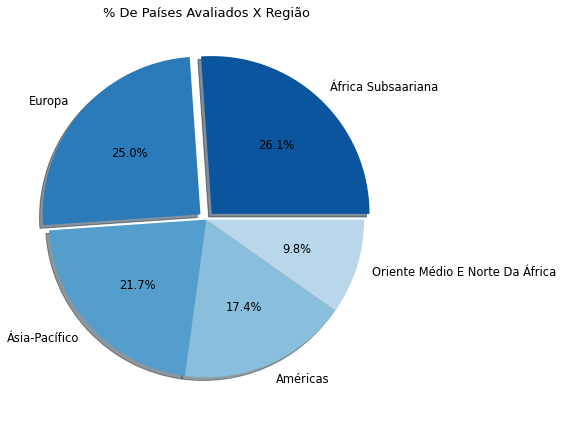

In [19]:
plt.figure(figsize = (16, 6))
plt.pie(data = df.groupby('regiao').agg({
    'pais': 'size'
}).sort_values('pais', ascending = False), x = 'pais', labels = ['África Subsaariana', 'Europa', 'Ásia-Pacífico', 'Américas',
       'Oriente Médio E Norte Da África'], autopct = '%1.1f%%', colors = sns.color_palette('Blues_r'),
        shadow = True, explode = [0.05, 0.05, 0, 0, 0],
        textprops = {'fontsize': 11.5, 'color': 'k'})
plt.title('% De Países Avaliados X Região', fontsize = 13, color = 'k')
plt.tight_layout()
plt.show();

In [20]:
df.loc[df['pontuacao_2022'] >= 70, 'avaliacao_final'] = 'Maioritariamente Livre'
df.loc[((df['pontuacao_2022'] >= 60) 
  & (df['pontuacao_2022'] <= 69.9)), 'avaliacao_final'] = 'Moderadamente Livre'
df.loc[((df['pontuacao_2022'] >= 50)
  & (df['pontuacao_2022'] <= 59.9)), 'avaliacao_final'] = 'Maioritariamente Não-Livre'
df.loc[df['pontuacao_2022'] < 50, 'avaliacao_final'] = 'Reprimido'

In [21]:
(df['avaliacao_final'].value_counts(normalize = True) * 100).round(2)

Maioritariamente Não-Livre    32.20
Moderadamente Livre           30.51
Maioritariamente Livre        19.21
Reprimido                     18.08
Name: avaliacao_final, dtype: float64

In [22]:
df.groupby(['regiao', 'avaliacao_final']).agg({
    'pais': 'size'})

pais
regiao                       avaliacao_final                 
Americas                     Maioritariamente Livre         5
                             Maioritariamente Não-Livre    11
                             Moderadamente Livre           12
                             Reprimido                      4
Asia-Pacific                 Maioritariamente Livre         5
                             Maioritariamente Não-Livre    11
                             Moderadamente Livre           13
                             Reprimido                     10
Europe                       Maioritariamente Livre        22
                             Maioritariamente Não-Livre     5
                             Moderadamente Livre           18
Middle East and North Africa Maioritariamente Livre         1
                             Maioritariamente Não-Livre     5
                             Moderadamente Livre            4
                             Reprimido                      4
Sub-Saharan Africa           Maioritariamente Livre         1
                             Maioritariamente Não-Livre    25
                             Moderadamente Livre            7
                             Reprimido                     14

In [23]:
df.groupby(['regiao', 'avaliacao_final']).agg({
  'pais': 'size'}).swaplevel().loc['Maioritariamente Livre']

,pais
regiao,
Americas,5
Asia-Pacific,5
Europe,22
Middle East and North Africa,1
Sub-Saharan Africa,1


In [24]:
df.groupby(['regiao', 'avaliacao_final']).agg({
  'pais': 'size'}).swaplevel().loc['Maioritariamente Livre'].pais.to_numpy()

array([ 5,  5, 22,  1,  1])

In [25]:
df.groupby(['regiao', 'avaliacao_final']).agg({
  'pais': 'size'}).swaplevel().loc['Moderadamente Livre']

,pais
regiao,
Americas,12
Asia-Pacific,13
Europe,18
Middle East and North Africa,4
Sub-Saharan Africa,7


In [26]:
df.groupby(['regiao', 'avaliacao_final']).agg({
  'pais': 'size'}).swaplevel().loc['Moderadamente Livre'].pais.to_numpy()

array([12, 13, 18,  4,  7])

In [27]:
df.groupby(['regiao', 'avaliacao_final']).agg({
  'pais': 'size'}).swaplevel().loc['Maioritariamente Não-Livre']

,pais
regiao,
Americas,11
Asia-Pacific,11
Europe,5
Middle East and North Africa,5
Sub-Saharan Africa,25


In [28]:
df.groupby(['regiao', 'avaliacao_final']).agg({
  'pais': 'size'}).swaplevel().loc['Maioritariamente Não-Livre'].pais.to_numpy()

array([11, 11,  5,  5, 25])

In [29]:
df.groupby(['regiao', 'avaliacao_final']).agg({
  'pais': 'size'}).swaplevel().loc['Reprimido']

,pais
regiao,
Americas,4
Asia-Pacific,10
Middle East and North Africa,4
Sub-Saharan Africa,14


In [30]:
df.groupby(['regiao', 'avaliacao_final']).agg({
  'pais': 'size'}).swaplevel().loc['Reprimido'].pais.to_numpy()

array([ 4, 10,  4, 14])

In [31]:
array_1 = sorted(array_1, reverse = True)
array_1

[48, 46, 40, 32, 18]

In [32]:
sns.color_palette('Blues_r')

[(0.044059976931949255, 0.3338869665513264, 0.6244521337946944),
 (0.16696655132641294, 0.48069204152249134, 0.7291503267973857),
 (0.3262898885044214, 0.6186236063052672, 0.802798923490965),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.8584083044982699, 0.9134486735870818, 0.9645674740484429)]

In [33]:
lista_2 = [1, 22, 5,  5, 1]
lista_2

[1, 22, 5, 5, 1]

In [34]:
[sum(data) for data in zip(array_1, lista_2)]

[49, 68, 45, 37, 19]

In [35]:
lista_3 = [7, 18, 13, 12, 4]
lista_3

[7, 18, 13, 12, 4]

In [36]:
lista_4 = [25, 5, 11, 11, 5]
lista_4

[25, 5, 11, 11, 5]

In [37]:
[sum(data) for data in zip(array_1, lista_2, lista_3)]

[56, 86, 58, 49, 23]

In [38]:
lista_5 = [14, 0, 10, 4, 4]
lista_5

[14, 0, 10, 4, 4]

In [39]:
df[df['pais'] == 'Brazil'].pontuacao_2022

pais_id
22    53.3
Name: pontuacao_2022, dtype: float64

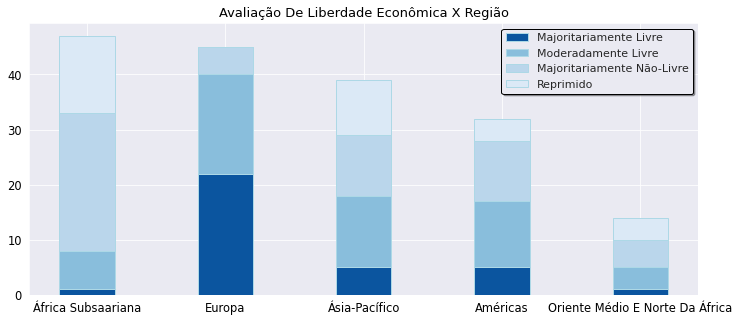

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize = (12, 5))
width = 0.4
index = list(range(0, 5))
plt.title('Avaliação De Liberdade Econômica X Região', fontsize = 13, color = 'k')
plt.xticks(index, ('África Subsaariana', 'Europa', 'Ásia-Pacífico', 'Américas',
       'Oriente Médio E Norte Da África'), fontsize = 11.5, color = 'k')
plt.yticks(fontsize = 11.5, color = 'k')
#reg_1 = plt.bar(index, array_1, width, color = sns.color_palette('Blues_r')[0],
#                edgecolor = 'dodgerblue')
bar_2 = plt.bar(index, lista_2, width,
                color = sns.color_palette('Blues_r')[0], label = 'Majoritariamente Livre',
                edgecolor = 'lightblue')
bar_3 = plt.bar(index, lista_3, width, bottom = lista_2,
                color = sns.color_palette('Blues_r')[3], label = 'Moderadamente Livre',
                edgecolor = 'lightblue')
bar_4 = plt.bar(index, lista_4, width, bottom = [sum(data) for data in zip(lista_2, lista_3)],
                color = sns.color_palette('Blues_r')[4], label = 'Majoritariamente Não-Livre',
                edgecolor = 'lightblue')
bar_5 = plt.bar(index, lista_5, width, bottom = [sum(data) for data in zip(lista_2, lista_3, lista_4)],
                color = sns.color_palette('Blues_r')[5], label = 'Reprimido', edgecolor = 'lightblue')
plt.legend(edgecolor = 'k', shadow = True, prop = {'size': 11})
plt.show()

In [41]:
df.pontuacao_2022.mean()

59.99887005649718

In [42]:
df.pontuacao_2022.median()

59.8

In [43]:
df.pontuacao_2022.quantile(0.25)

53.3

In [44]:
df.pontuacao_2022.quantile(0.75)

67.6

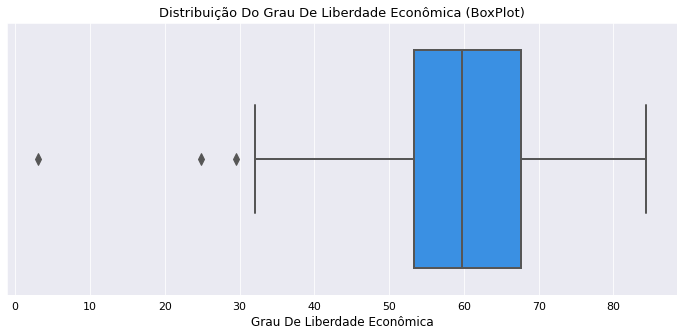

In [45]:
ax = sns.boxplot(x = df['pontuacao_2022'], orient = 'h',
                 color = 'dodgerblue', fliersize = 8, linewidth = 2)
ax.set_ylabel('')
ax.set_xlabel('Grau De Liberdade Econômica', fontsize = 12, color = 'k')
ax.set_xticks(list(range(0, 81, 10)))
plt.xticks(fontsize = 11, color = 'k')
ax.set_title('Distribuição Do Grau De Liberdade Econômica (BoxPlot)',
             fontsize = 13, color = 'k')
ax.figure.set_size_inches(12, 5)
plt.show();

In [46]:
lista_5 = list(df.regiao.unique())
lista_5

['Asia-Pacific',
 'Europe',
 'Middle East and North Africa',
 'Sub-Saharan Africa',
 'Americas']

In [47]:
for i in lista_5:
  print(i)
  print(df.groupby(['regiao', 'pais']).agg({
      'pontuacao_2022': 'sum'
  }).loc[i].describe())
  print('\n')

Asia-Pacific
       pontuacao_2022
count       40.000000
mean        57.077500
std         16.227667
min          0.000000
25%         49.700000
50%         58.150000
75%         64.400000
max         84.400000


Europe
       pontuacao_2022
count       46.000000
mean        68.004348
std         12.793557
min          0.000000
25%         65.225000
50%         69.650000
75%         75.550000
max         84.200000


Middle East and North Africa
       pontuacao_2022
count       18.000000
mean        44.244444
std         25.464560
min          0.000000
25%         43.250000
50%         54.850000
75%         59.875000
max         70.200000


Sub-Saharan Africa
       pontuacao_2022
count       48.000000
mean        52.293750
std         10.838376
min          0.000000
25%         48.650000
50%         54.200000
75%         58.450000
max         70.900000


Americas
       pontuacao_2022
count        32.00000
mean         59.43750
std          11.56133
min          24.80000
25%          

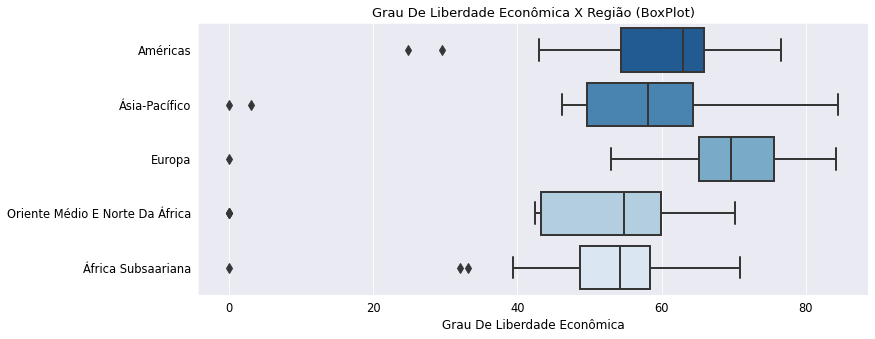

In [48]:
ax = sns.boxplot(data = df.groupby(['regiao', 'pais']).agg({
      'pontuacao_2022': 'sum'
  }).reset_index(), y = 'regiao', x = 'pontuacao_2022',
  palette = 'Blues_r', fliersize = 7, linewidth = 2)
ax.set_xlabel('Grau De Liberdade Econômica', fontsize = 12, color = 'k')
ax.set_ylabel('')
ax.set_yticklabels(['Américas', 'Ásia-Pacífico',
                    'Europa', 'Oriente Médio E Norte Da África', 'África Subsaariana'],
                   fontsize = 11.5, color = 'k')
ax.figure.set_size_inches(12, 5)
ax.set_xticklabels([0, 0, 20, 40, 60, 80], color = 'k', fontsize = 11.5)
ax.set_title('Grau De Liberdade Econômica X Região (BoxPlot)', fontsize = 13, color = 'k');

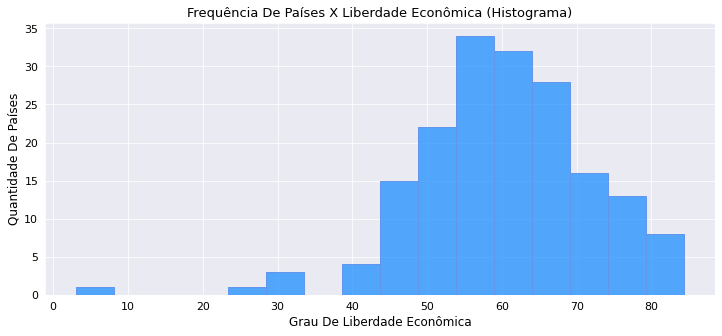

In [49]:
ax = sns.histplot(data = df['pontuacao_2022'], color = 'dodgerblue', 
                  edgecolor = 'cornflowerblue')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Grau De Liberdade Econômica', fontsize = 12, color = 'k')
ax.set_ylabel('Quantidade De Países', fontsize = 12, color = 'k')
ax.set_yticklabels([0, 5, 10, 15, 20, 25, 30, 35], fontsize = 11, color = 'k')
ax.set_xticklabels([0, 0, 10, 20, 30, 40, 50, 60, 70, 80], 
                   fontsize = 11, color = 'k')
ax.set_title('Frequência De Países X Liberdade Econômica (Histograma)',
             fontsize = 13, color = 'k')
plt.show()

In [50]:
df[['pais', 'pontuacao_2022']].sort_values('pontuacao_2022', ascending = False).head(10)

,pais,pontuacao_2022
pais_id,,
147,Singapore,84.4
158,Switzerland,84.2
78,Ireland,82.0
99,Luxembourg,80.6
120,New Zealand,80.6
160,Taiwan,80.1
54,Estonia,80.0
119,Netherlands,79.5
57,Finland,78.3


In [51]:
df[df['pontuacao_2022'].isnull() == False
   ][['pais', 'pontuacao_2022']].sort_values('pontuacao_2022', ascending = False).tail(10)

,pais,pontuacao_2022
pais_id,,
31,Central African Republic,45.7
19,Bolivia,43.0
76,Iran,42.4
53,Eritrea,39.7
26,Burundi,39.4
183,Zimbabwe,33.1
154,Sudan,32.0
42,Cuba,29.5
179,Venezuela,24.8


In [52]:
df[['pais', 'pontuacao_2022']].sort_values('pontuacao_2022', ascending = False).pais[:20].to_numpy()

array(['Singapore', 'Switzerland', 'Ireland', 'Luxembourg', 'New Zealand',
       'Taiwan ', 'Estonia', 'Netherlands', 'Finland', 'Denmark',
       'Sweden', 'Australia', 'Iceland', 'Norway', 'Canada', 'Germany',
       'Lithuania', 'Latvia', 'Korea, South', 'Czech Republic'],
      dtype=object)

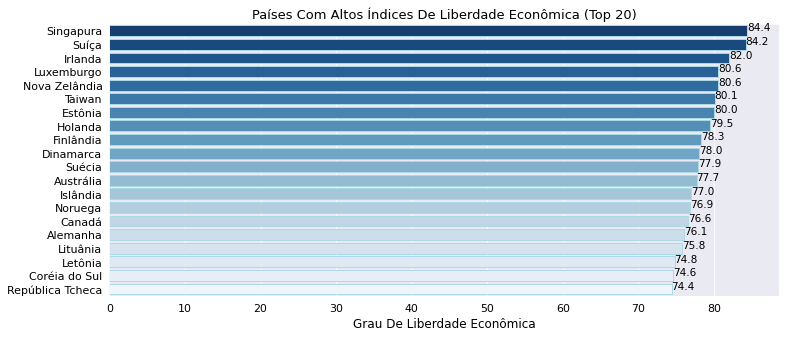

In [53]:
ax = sns.barplot(data = df[['pais', 'pontuacao_2022']].sort_values('pontuacao_2022', ascending = False).head(20),
                 y = 'pais', x = 'pontuacao_2022', palette = 'Blues_r', edgecolor = 'lightblue')
ax.set_xlabel('Grau De Liberdade Econômica', fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 81, 10)), fontsize = 11, color = 'k')
ax.set_ylabel('')
ax.set_yticklabels(['Singapura', 'Suíça', 'Irlanda', 'Luxemburgo', 'Nova Zelândia',
        'Taiwan', 'Estônia', 'Holanda', 'Finlândia', 'Dinamarca',
        'Suécia', 'Austrália', 'Islândia', 'Noruega', 'Canadá', 'Alemanha',
        'Lituânia', 'Letônia', 'Coréia do Sul', 'República Tcheca'], fontsize = 11, color = 'k')
ax.set_title('Países Com Altos Índices De Liberdade Econômica (Top 20)',
             fontsize = 13, color = 'k')
for index, value in enumerate(df[['pais', 'pontuacao_2022']].sort_values('pontuacao_2022', ascending = False
                                                                         ).pontuacao_2022[:20]):
  plt.text(value, index, str(value), color = 'k', fontsize = 10.5)
ax.figure.set_size_inches(12, 5)
plt.show()

In [54]:
df[df['pontuacao_2022'].isnull() == False
][['pais', 'pontuacao_2022']].sort_values('pontuacao_2022', ascending = False).pais[-20:].to_numpy()

array(['China', 'Liberia', 'Congo, Democratic Republic of the Congo',
       'Lebanon', 'Maldives', 'Equatorial Guinea', 'Timor-Leste',
       'Turkmenistan', 'Guinea-Bissau', 'Algeria',
       'Central African Republic', 'Bolivia', 'Iran', 'Eritrea',
       'Burundi', 'Zimbabwe', 'Sudan', 'Cuba', 'Venezuela',
       'Korea, North '], dtype=object)

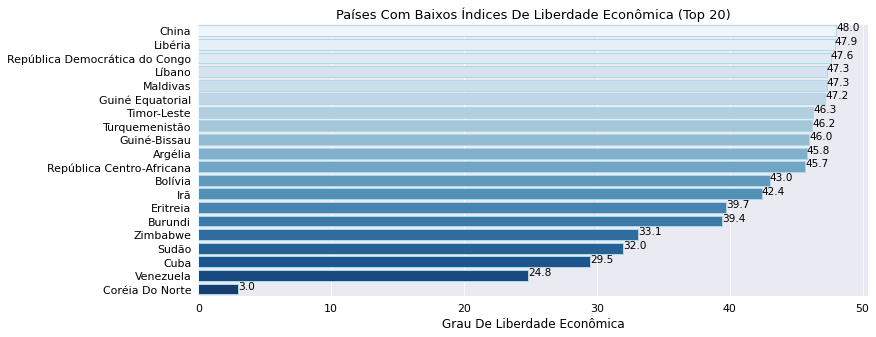

In [55]:
ax = sns.barplot(data = df[
                           df['pontuacao_2022'].isnull() == False
][['pais', 'pontuacao_2022']].sort_values('pontuacao_2022', ascending = False).tail(20),
                 y = 'pais', x = 'pontuacao_2022', palette = 'Blues', edgecolor = 'lightblue')
ax.figure.set_size_inches(12, 5)
ax.set_ylabel('')
ax.set_yticklabels(['China', 'Libéria', 'República Democrática do Congo',
        'Líbano', 'Maldivas', 'Guiné Equatorial', 'Timor-Leste',
        'Turquemenistão', 'Guiné-Bissau', 'Argélia',
        'República Centro-Africana', 'Bolívia', 'Irã', 'Eritreia',
        'Burundi', 'Zimbabwe', 'Sudão', 'Cuba', 'Venezuela',
        'Coréia Do Norte'], fontsize = 11, color = 'k')
ax.set_xticklabels([0, 10, 20, 30, 40, 50], fontsize = 11, color = 'k')
ax.set_xlabel('Grau De Liberdade Econômica', fontsize = 12, color = 'k')
ax.set_title('Países Com Baixos Índices De Liberdade Econômica (Top 20)',
             fontsize = 13, color = 'k')
for index, value in enumerate(df[
                           df['pontuacao_2022'].isnull() == False
][['pais', 'pontuacao_2022']].sort_values('pontuacao_2022', ascending = False).pontuacao_2022[-20:]):
  plt.text(value, index, str(value), color = 'k', fontsize = 10.5)
plt.show()

In [56]:
(df[df['regiao'] == 'Europe'].avaliacao_final.value_counts(normalize = True) * 100).round(2)

Maioritariamente Livre        48.89
Moderadamente Livre           40.00
Maioritariamente Não-Livre    11.11
Name: avaliacao_final, dtype: float64

In [57]:
(df[df['regiao'] == 'Americas'].avaliacao_final.value_counts(normalize = True) * 100).round(2)

Moderadamente Livre           37.50
Maioritariamente Não-Livre    34.38
Maioritariamente Livre        15.62
Reprimido                     12.50
Name: avaliacao_final, dtype: float64

In [58]:
(df[df['regiao'] == 'Middle East and North Africa'].avaliacao_final.value_counts(normalize = True) * 100).round(2)

Maioritariamente Não-Livre    35.71
Reprimido                     28.57
Moderadamente Livre           28.57
Maioritariamente Livre         7.14
Name: avaliacao_final, dtype: float64

In [59]:
(df[df['regiao'] == 'Sub-Saharan Africa'].avaliacao_final.value_counts(normalize = True) * 100).round(2)

Maioritariamente Não-Livre    53.19
Reprimido                     29.79
Moderadamente Livre           14.89
Maioritariamente Livre         2.13
Name: avaliacao_final, dtype: float64

In [60]:
(df[df['regiao'] == 'Asia-Pacific'].avaliacao_final.value_counts(normalize = True) * 100).round(2)

Moderadamente Livre           33.33
Maioritariamente Não-Livre    28.21
Reprimido                     25.64
Maioritariamente Livre        12.82
Name: avaliacao_final, dtype: float64

In [61]:
df[df['regiao'] == 'Europe'].avaliacao_final.value_counts().to_numpy()

array([22, 18,  5])

In [62]:
df[df['regiao'] == 'Europe'].avaliacao_final.value_counts().index

Index(['Maioritariamente Livre', 'Moderadamente Livre',
       'Maioritariamente Não-Livre'],
      dtype='object')

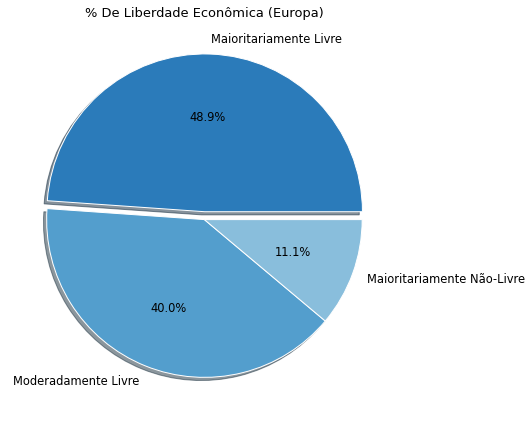

In [63]:
plt.figure(figsize = (16, 6))
plt.pie(x = [22, 18,  5],
             labels = ['Maioritariamente Livre', 'Moderadamente Livre',
       'Maioritariamente Não-Livre'], autopct = '%1.1f%%', textprops = {'fontsize': 11.5,
                                                                        'color': 'k'},
        colors = sns.color_palette('Blues_r')[1:], shadow = True, explode = [0.05, 0, 0],
        wedgeprops = {'edgecolor': 'white'})
plt.title('% De Liberdade Econômica (Europa)', fontsize = 13, color = 'k')
plt.tight_layout();

In [64]:
df[df['regiao'] == 'Americas'].avaliacao_final.value_counts().to_numpy()

array([12, 11,  5,  4])

In [65]:
df[df['regiao'] == 'Americas'].avaliacao_final.value_counts().index

Index(['Moderadamente Livre', 'Maioritariamente Não-Livre',
       'Maioritariamente Livre', 'Reprimido'],
      dtype='object')

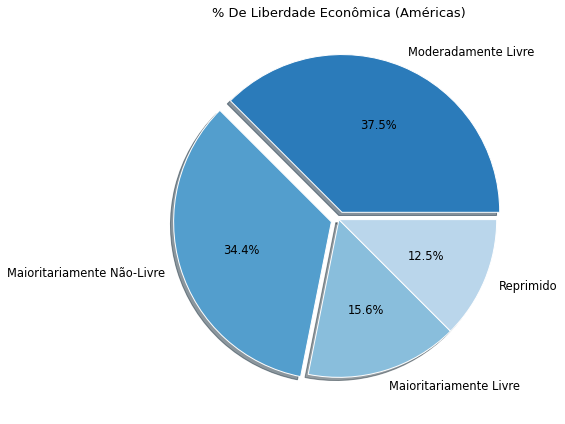

In [66]:
plt.figure(figsize = (16, 6))
plt.pie(x = [12, 11,  5,  4],
             labels = ['Moderadamente Livre', 'Maioritariamente Não-Livre',
       'Maioritariamente Livre', 'Reprimido'], autopct = '%1.1f%%', textprops = {'fontsize': 11.5,
                                                                        'color': 'k'},
        colors = sns.color_palette('Blues_r')[1:], shadow = True, explode = [0.05, 0.05, 0, 0])
plt.title('% De Liberdade Econômica (Américas)', fontsize = 13, color = 'k')
plt.tight_layout();

In [67]:
df[df['regiao'] == 'Middle East and North Africa'].avaliacao_final.value_counts().to_numpy()

array([5, 4, 4, 1])

In [68]:
df[df['regiao'] == 'Middle East and North Africa'].avaliacao_final.value_counts().index

Index(['Maioritariamente Não-Livre', 'Reprimido', 'Moderadamente Livre',
       'Maioritariamente Livre'],
      dtype='object')

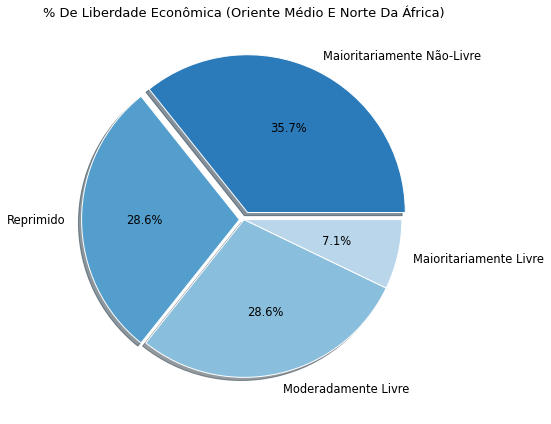

In [69]:
plt.figure(figsize = (16, 6))
plt.pie(x = [5, 4, 4, 1],
             labels = ['Maioritariamente Não-Livre', 'Reprimido', 'Moderadamente Livre',
       'Maioritariamente Livre'], autopct = '%1.1f%%', textprops = {'fontsize': 11.5,
                                                                        'color': 'k'},
        colors = sns.color_palette('Blues_r')[1:], shadow = True, explode = [0.05, 0.03, 0, 0])
plt.title('% De Liberdade Econômica (Oriente Médio E Norte Da África)', fontsize = 13, color = 'k')
plt.tight_layout();

In [70]:
df[df['regiao'] == 'Sub-Saharan Africa'].avaliacao_final.value_counts().to_numpy()

array([25, 14,  7,  1])

In [71]:
df[df['regiao'] == 'Sub-Saharan Africa'].avaliacao_final.value_counts().index

Index(['Maioritariamente Não-Livre', 'Reprimido', 'Moderadamente Livre',
       'Maioritariamente Livre'],
      dtype='object')

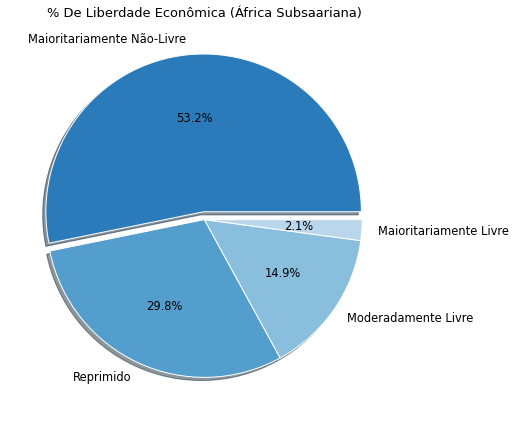

In [72]:
plt.figure(figsize = (16, 6))
plt.pie(x = [25, 14,  7,  1],
             labels = ['Maioritariamente Não-Livre', 'Reprimido', 'Moderadamente Livre',
       'Maioritariamente Livre'], autopct = '%1.1f%%', textprops = {'fontsize': 11.5,
                                                                        'color': 'k'},
        colors = sns.color_palette('Blues_r')[1:], shadow = True, explode = [0.05, 0, 0, 0])
plt.title('% De Liberdade Econômica (África Subsaariana)', fontsize = 13, color = 'k')
plt.tight_layout();

In [73]:
df[df['regiao'] == 'Asia-Pacific'].avaliacao_final.value_counts().to_numpy()

array([13, 11, 10,  5])

In [74]:
df[df['regiao'] == 'Asia-Pacific'].avaliacao_final.value_counts().index

Index(['Moderadamente Livre', 'Maioritariamente Não-Livre', 'Reprimido',
       'Maioritariamente Livre'],
      dtype='object')

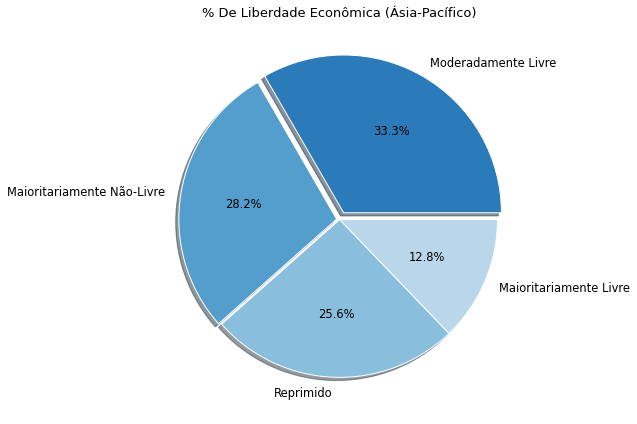

In [75]:
plt.figure(figsize = (16, 6))
plt.pie(x = [13, 11, 10,  5],
             labels = ['Moderadamente Livre', 'Maioritariamente Não-Livre', 'Reprimido',
       'Maioritariamente Livre'], autopct = '%1.1f%%', textprops = {'fontsize': 11.5,
                                                                        'color': 'k'},
        colors = sns.color_palette('Blues_r')[1:], shadow = True, explode = [0.05, 0.02, 0, 0])
plt.title('% De Liberdade Econômica (Ásia-Pacífico)', fontsize = 13, color = 'k')
plt.tight_layout();

In [76]:
for i in lista_5:
  print(i)
  print(df.groupby(['regiao', 'pais']).agg({'%_carga_tributacao_pib': 'sum',
                                      '%_despesas_gov_do_pib': 'sum'}).loc[i].describe())
  print('\n')

Asia-Pacific
       %_carga_tributacao_pib  %_despesas_gov_do_pib
count               40.000000              40.000000
mean                16.666750              30.373658
std                  8.213468              19.764876
min                  0.000000               0.000000
25%                 10.902500              21.149083
50%                 15.680000              27.289500
75%                 21.387500              35.009417
max                 37.260000             119.134333


Europe
       %_carga_tributacao_pib  %_despesas_gov_do_pib
count               46.000000              46.000000
mean                29.437826              41.193225
std                 10.796945               9.988483
min                  0.000000               0.000000
25%                 22.205000              35.268333
50%                 31.950000              42.977500
75%                 38.557500              47.484083
max                 46.340000              57.593333


Middle East and North 

In [77]:
lista_5

['Asia-Pacific',
 'Europe',
 'Middle East and North Africa',
 'Sub-Saharan Africa',
 'Americas']

In [78]:
df.groupby(['regiao', 'pais']).agg({
    '%_carga_tributacao_pib': 'sum', 
    '%_despesas_gov_do_pib': 'sum'
}).reset_index('pais').index.unique()

Index(['Americas', 'Asia-Pacific', 'Europe', 'Middle East and North Africa',
       'Sub-Saharan Africa'],
      dtype='object', name='regiao')

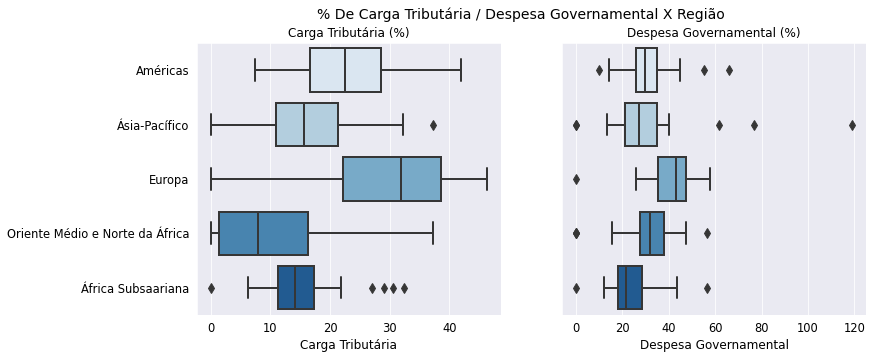

In [79]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5), sharey = True)
sns.boxplot(data = df.groupby(['regiao', 'pais']).agg({
    '%_carga_tributacao_pib': 'sum', 
    '%_despesas_gov_do_pib': 'sum'
}).reset_index(),
                 x = '%_carga_tributacao_pib', y = 'regiao', palette = 'Blues', fliersize = 7,
                 linewidth = 2, ax = ax[0])
ax[0].set_xlabel('Carga Tributária', fontsize = 12, color = 'k')
ax[0].set_xticklabels([0, 0, 10, 20, 30, 40], fontsize = 11.5, color = 'k')
ax[0].set_yticklabels(['Américas', 'Ásia-Pacífico', 'Europa', 'Oriente Médio e Norte da África',
        'África Subsaariana'], fontsize = 11.5, color = 'k')
ax[0].set_ylabel('')
ax[0].figure.set_size_inches(12, 5)
ax[0].set_title('Carga Tributária (%)', fontsize = 12, color = 'k')
sns.boxplot(data = df.groupby(['regiao', 'pais']).agg({
    '%_carga_tributacao_pib': 'sum', 
    '%_despesas_gov_do_pib': 'sum'
}).reset_index(),
                 x = '%_despesas_gov_do_pib', y = 'regiao', palette = 'Blues', fliersize = 7,
                 linewidth = 2, ax = ax[1])
ax[1].set_yticklabels(['Américas', 'Ásia-Pacífico', 'Europa', 'Oriente Médio e Norte da África',
        'África Subsaariana'], fontsize = 11.5, color = 'k')
ax[1].set_ylabel('')
ax[1].set_xlabel('Despesa Governamental', fontsize = 12, color = 'k')
fig.suptitle('% De Carga Tributária / Despesa Governamental X Região', fontsize = 14, color = 'k')
ax[1].set_title('Despesa Governamental (%)', fontsize = 12, color = 'k')
ax[1].set_xticklabels([0, 0, 20, 40, 60, 80, 100, 120], fontsize = 11.5, color = 'k')
plt.show()

In [139]:
df.groupby('regiao').agg({
    '%_carga_tributacao_pib': ['mean', 'median']
}).sort_values([('%_carga_tributacao_pib', 'mean'), ('%_carga_tributacao_pib', 'median')],
               ascending = False).round(2)

%_carga_tributacao_pib       
                                                  mean median
regiao                                                       
Europa                                           30.09  32.70
Américas                                         22.90  22.55
Ásia-Pacífico                                    17.09  15.80
África Subsaariana                               15.12  14.10
Oriente Médio E Norte Da África                  14.29  14.70

In [141]:
df.groupby('regiao').agg({
    '%_despesas_gov_do_pib': ['mean', 'median']
}).sort_values([('%_despesas_gov_do_pib', 
'mean'), ('%_despesas_gov_do_pib'
, 'median')], ascending = False).round(2)

%_despesas_gov_do_pib       
                                                 mean median
regiao                                                      
Europa                                          42.11  43.02
Oriente Médio E Norte Da África                 35.02  33.17
Ásia-Pacífico                                   31.97  27.87
Américas                                        31.07  29.90
África Subsaariana                              24.04  21.85

In [82]:
(df['%_carga_tributacao_pib'].corr(df['%_despesas_gov_do_pib'])).round(2)

0.57

In [83]:
df[['pais', '%_carga_tributacao_pib', 'regiao']].sort_values('%_carga_tributacao_pib',
                                                             ascending = False).head(20)

,pais,%_carga_tributacao_pib,regiao
pais_id,,,
45,Denmark,46.34,Europe
58,France,45.40,Europe
15,Belgium,42.92,Europe
157,Sweden,42.91,Europe
80,Italy,42.45,Europe
8,Austria,42.44,Europe
57,Finland,42.19,Europe
42,Cuba,42.00,Americas
124,Norway,39.93,Europe


In [84]:
df[['pais', '%_despesas_gov_do_pib', 'regiao']].sort_values('%_despesas_gov_do_pib',
                                                             ascending = False).head(20).round(2)

,pais,%_despesas_gov_do_pib,regiao
pais_id,,,
86,Kiribati,119.13,Asia-Pacific
164,Timor-Leste,76.69,Asia-Pacific
42,Cuba,65.90,Americas
111,Micronesia,61.51,Asia-Pacific
58,France,57.59,Europe
89,Kuwait,56.56,Middle East and North Africa
94,Lesotho,56.41,Sub-Saharan Africa
47,Dominica,55.24,Americas
15,Belgium,54.75,Europe


In [85]:
df[['pais', '%_carga_tributacao_pib', 'regiao']].sort_values('%_carga_tributacao_pib',
                                                             ascending = False).pais[:20].to_numpy()

array(['Denmark', 'France', 'Belgium', 'Sweden', 'Italy', 'Austria',
       'Finland', 'Cuba', 'Norway', 'Netherlands', 'Luxembourg',
       'Germany', 'Greece', 'Montenegro', 'Slovenia', 'Micronesia',
       'Algeria', 'Iceland', 'Hungary', 'Poland'], dtype=object)

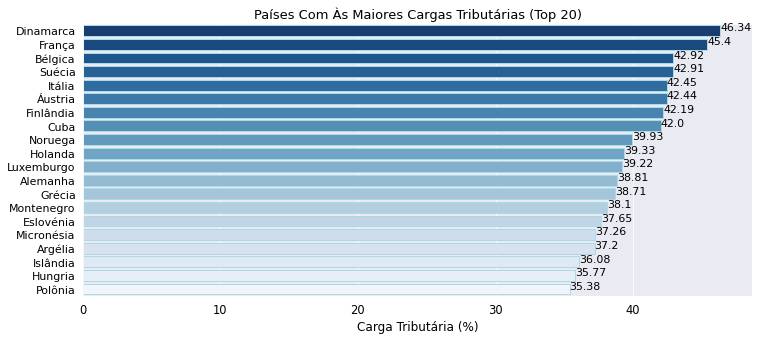

In [86]:
ax = sns.barplot(data = df[['pais', '%_carga_tributacao_pib', 'regiao']].sort_values('%_carga_tributacao_pib',
                                                             ascending = False).head(20),
                 y = 'pais', x = '%_carga_tributacao_pib', palette = 'Blues_r', edgecolor = 'lightblue')
ax.set_xlabel('Carga Tributária (%)', fontsize = 12, color = 'k')
ax.set_ylabel('')
ax.set_yticklabels(['Dinamarca', 'França', 'Bélgica', 'Suécia', 'Itália', 'Áustria',
        'Finlândia', 'Cuba', 'Noruega', 'Holanda', 'Luxemburgo',
        'Alemanha', 'Grécia', 'Montenegro', 'Eslovénia', 'Micronésia',
        'Argélia', 'Islândia', 'Hungria', 'Polônia'], fontsize = 11, color = 'k')
ax.set_xticklabels(list(range(0, 41, 10)), fontsize = 11.5, color = 'k')
ax.set_title('Países Com Às Maiores Cargas Tributárias (Top 20)', fontsize = 13, color = 'k')
for index, value in enumerate(df[['pais', '%_carga_tributacao_pib', 'regiao']].sort_values('%_carga_tributacao_pib',
                                                             ascending = False)['%_carga_tributacao_pib'][:20]):
  plt.text(value, index, str(value), color = 'k', fontsize = 11)
ax.figure.set_size_inches(12, 5)
plt.show()

In [87]:
df[['pais', '%_carga_tributacao_pib', 'regiao']].sort_values('%_carga_tributacao_pib',
                                                             ascending = False).head(20).regiao.value_counts()

Europe                          17
Americas                         1
Asia-Pacific                     1
Middle East and North Africa     1
Name: regiao, dtype: int64

In [88]:
df[['pais', '%_despesas_gov_do_pib', 'regiao']].sort_values('%_despesas_gov_do_pib',
                                                             ascending = False).pais[:20].to_numpy()

array(['Kiribati', 'Timor-Leste', 'Cuba', 'Micronesia', 'France',
       'Kuwait', 'Lesotho', 'Dominica', 'Belgium', 'Finland', 'Greece',
       'Norway', 'Austria', 'Italy', 'Denmark', 'Croatia', 'Sweden',
       'Montenegro', 'Hungary', 'Oman'], dtype=object)

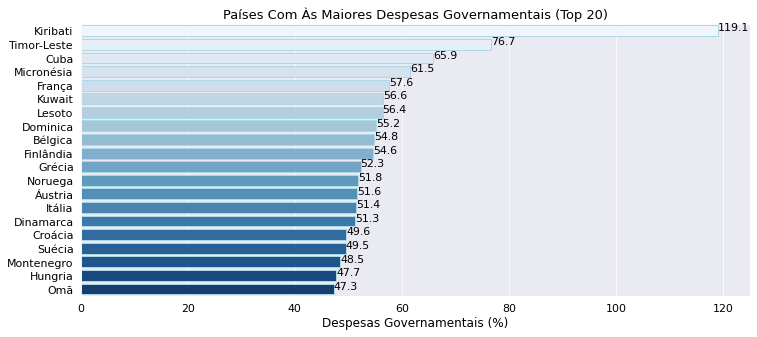

In [89]:
ax = sns.barplot(data = df[['pais', '%_despesas_gov_do_pib', 'regiao']].sort_values('%_despesas_gov_do_pib',
                                                             ascending = False).head(20).round(2),
                 y = 'pais', x = '%_despesas_gov_do_pib', palette = 'Blues', edgecolor = 'lightblue')
ax.figure.set_size_inches(12, 5)
ax.set_ylabel('')
ax.set_xlabel('Despesas Governamentais (%)', fontsize = 12, color = 'k')
ax.set_xticklabels(list(range(0, 121, 20)), fontsize = 11, color = 'k')
ax.set_yticklabels(['Kiribati', 'Timor-Leste', 'Cuba', 'Micronésia', 'França',
        'Kuwait', 'Lesoto', 'Dominica', 'Bélgica', 'Finlândia', 'Grécia',
        'Noruega', 'Áustria', 'Itália', 'Dinamarca', 'Croácia', 'Suécia',
        'Montenegro', 'Hungria', 'Omã'], fontsize = 11, color = 'k')
for index, value in enumerate( df[['pais', '%_despesas_gov_do_pib', 'regiao']].sort_values('%_despesas_gov_do_pib',
                                                             ascending = False)['%_despesas_gov_do_pib'][:20].round(1)):
  plt.text(value, index, str(value), fontsize = 11, color = 'k')
ax.set_title('Países Com Às Maiores Despesas Governamentais (Top 20)', fontsize = 13, color = 'k')
plt.show()

In [90]:
df[['pais', '%_despesas_gov_do_pib', 'regiao']].sort_values('%_despesas_gov_do_pib',
                                                             ascending = False).head(20).regiao.value_counts()

Europe                          12
Asia-Pacific                     3
Americas                         2
Middle East and North Africa     2
Sub-Saharan Africa               1
Name: regiao, dtype: int64

In [91]:
df.groupby('regiao').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita',
                                                                ascending = False).pib_per_capita.to_numpy()

array([1715006.01 ,  688776.231,  544210.414,  454598.879,  246945.669])

In [92]:
df.groupby('regiao').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita',
                                                                ascending = False).index

Index(['Europe', 'Asia-Pacific', 'Americas', 'Middle East and North Africa',
       'Sub-Saharan Africa'],
      dtype='object', name='regiao')

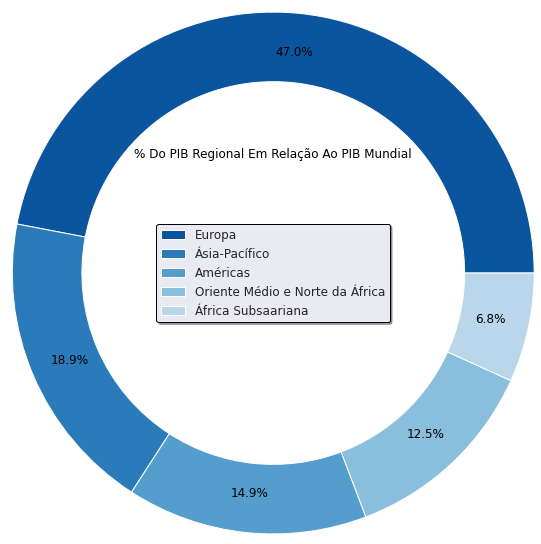

In [93]:
plt.figure(figsize = (4, 4))
plt.pie(df.groupby('regiao').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita',
                                                                ascending = False).pib_per_capita.to_numpy(),
        labeldistance = 1, radius = 3, colors = sns.color_palette('Blues_r'),
        wedgeprops = dict(width = 0.8), autopct = '%1.1f%%', textprops = {'fontsize': 12, 'color' : 'k'},
        pctdistance = 0.85)
plt.legend(labels = ['Europa', 'Ásia-Pacífico', 'Américas', 'Oriente Médio e Norte da África',
        'África Subsaariana'], loc = 'center', prop = {'size': 12}, edgecolor = 'k', shadow = True)
plt.title('% Do PIB Regional Em Relação Ao PIB Mundial', loc = 'Center',
          fontdict = {'fontsize': 12}, color = 'k')
plt.show()

In [94]:
df['pontuacao_2022'].corr(df['pib_per_capita'])

0.7026728323553447

In [95]:
(df[df['avaliacao_final'] == 'Maioritariamente Livre'].regiao.value_counts(normalize = True) * 100).round(2)

Europe                          64.71
Asia-Pacific                    14.71
Americas                        14.71
Sub-Saharan Africa               2.94
Middle East and North Africa     2.94
Name: regiao, dtype: float64

In [96]:
(df[df['avaliacao_final'] == 'Maioritariamente Não-Livre'].regiao.value_counts(normalize = True) * 100).round(2)

Sub-Saharan Africa              43.86
Americas                        19.30
Asia-Pacific                    19.30
Europe                           8.77
Middle East and North Africa     8.77
Name: regiao, dtype: float64

In [97]:
(df[df['avaliacao_final'] == 'Moderadamente Livre'].regiao.value_counts(normalize = True) * 100).round(2)

Europe                          33.33
Asia-Pacific                    24.07
Americas                        22.22
Sub-Saharan Africa              12.96
Middle East and North Africa     7.41
Name: regiao, dtype: float64

In [98]:
(df[df['avaliacao_final'] == 'Reprimido'].regiao.value_counts(normalize = True) * 100).round(2)

Sub-Saharan Africa              43.75
Asia-Pacific                    31.25
Middle East and North Africa    12.50
Americas                        12.50
Name: regiao, dtype: float64

In [99]:
df.groupby('regiao').agg({
    'pontuacao_2022': ['median', 'mean']
}).sort_values(('pontuacao_2022', 'mean'), ascending = False)

pontuacao_2022           
                                     median       mean
regiao                                                
Europe                                69.70  69.515556
Americas                              62.95  59.437500
Asia-Pacific                          59.20  58.541026
Middle East and North Africa          57.45  56.885714
Sub-Saharan Africa                    54.20  53.406383

In [100]:
df.regiao.replace({'Europe': 'Europa',
           'Asia-Pacific': 'Ásia-Pacífico',
           'Middle East and North Africa': 'Oriente Médio E Norte Da África',
            'Sub-Saharan Africa' : 'África Subsaariana', 
           'Americas' : 'Américas'}, inplace = True)

In [101]:
df.regiao.unique()

array(['Ásia-Pacífico', 'Europa', 'Oriente Médio E Norte Da África',
       'África Subsaariana', 'Américas'], dtype=object)

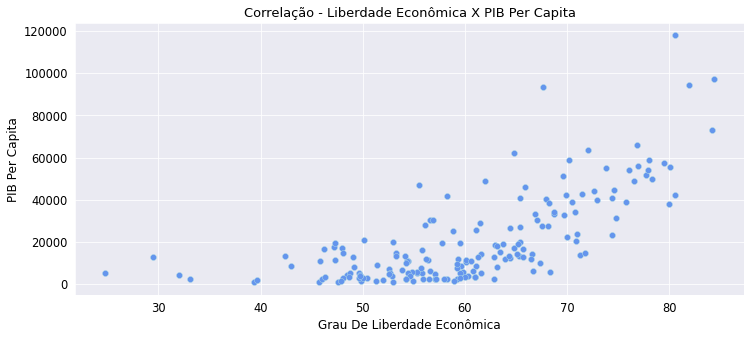

In [102]:
ax = sns.scatterplot(x = df['pontuacao_2022'], y = df['pib_per_capita'],
                     color = 'cornflowerblue', edgecolor = 'lightblue')
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Grau De Liberdade Econômica', fontsize = 12, color = 'k')
ax.set_ylabel('PIB Per Capita', fontsize = 12, color = 'k')
ax.set_xticklabels([30, 30, 40, 50, 60, 70, 80], fontsize = 11.5, color = 'k')
ax.set_yticklabels([0, 0, 20000, 40000, 60000, 80000, 100000, 120000], fontsize = 11.5, color = 'k')
ax.set_title('Correlação - Liberdade Econômica X PIB Per Capita', fontsize = 13, color = 'k')
plt.show()

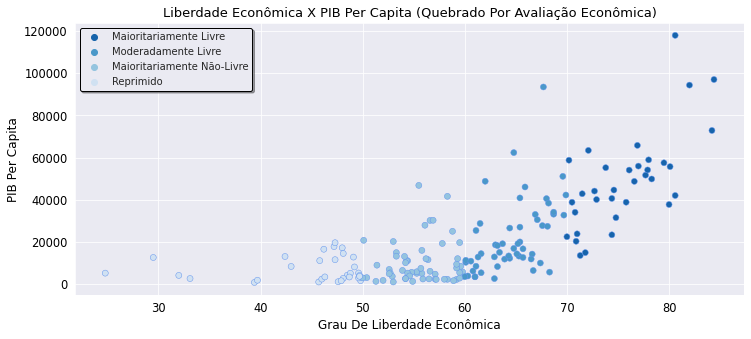

In [103]:
ax = sns.scatterplot(x = df['pontuacao_2022'], y = df['pib_per_capita'],
                     hue = df['avaliacao_final'], palette = 'Blues_r', edgecolor = 'cornflowerblue',
                     hue_order = ['Maioritariamente Livre', 'Moderadamente Livre',
                                  'Maioritariamente Não-Livre', 'Reprimido'])
ax.figure.set_size_inches(12, 5)
ax.set_xlabel('Grau De Liberdade Econômica', fontsize = 12, color = 'k')
ax.set_ylabel('PIB Per Capita', fontsize = 12, color = 'k')
ax.set_xticklabels([30, 30, 40, 50, 60, 70, 80], fontsize = 11.5, color = 'k')
ax.set_yticklabels([0, 0, 20000, 40000, 60000, 80000, 100000, 120000], fontsize = 11.5, color = 'k')
plt.legend(shadow = True, edgecolor = 'k', prop = {'size': 10})
ax.set_title('Liberdade Econômica X PIB Per Capita (Quebrado Por Avaliação Econômica)', fontsize = 13, color = 'k')
plt.show()

In [104]:
df['taxa_de_imposto_corporativo'].corr(df['pib_per_capita'])

-0.3727121090171555

In [105]:
df['carga_tributaria'].corr(df['pib_per_capita'])

-0.2028320728858779

In [106]:
df['gastos_do_governo'].corr(df['pib_per_capita'])

-0.38782241034364995

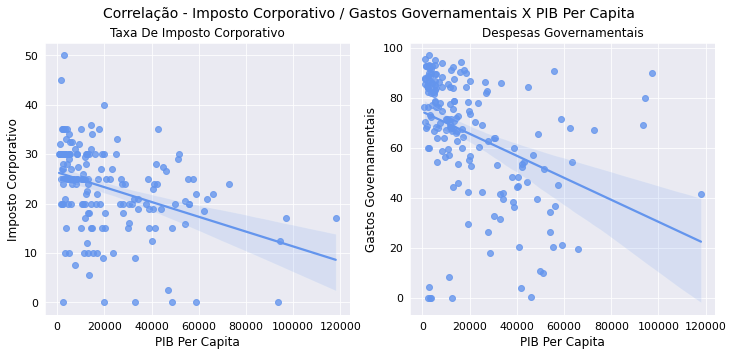

In [107]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5)) 
sns.regplot(y = df['taxa_de_imposto_corporativo'],
                 x = df['pib_per_capita'], ax = ax[0], color = 'cornflowerblue')
sns.regplot(y = df['gastos_do_governo'],
                 x = df['pib_per_capita'], ax = ax[1], color = 'cornflowerblue')
ax[0].set_xlabel('PIB Per Capita', fontsize = 12, color = 'k')
ax[0].set_ylabel('Imposto Corporativo', fontsize = 12, color = 'k')
ax[0].set_xticklabels([0, 0, 20000, 40000, 60000, 80000, 100000, 120000], fontsize = 11, color = 'k')
ax[0].set_yticklabels([0, 0, 10, 20, 30, 40, 50], fontsize = 11, color = 'k')
ax[1].set_xticklabels([0, 0, 20000, 40000, 60000, 80000, 100000, 120000], fontsize = 11, color = 'k')
ax[1].set_yticklabels([0, 0, 20, 40, 60, 80, 100], fontsize = 11, color = 'k')
ax[1].set_ylabel('Gastos Governamentais', fontsize = 12, color = 'k')
ax[1].set_xlabel('PIB Per Capita', fontsize = 12, color = 'k')
ax[0].set_title('Taxa De Imposto Corporativo', fontsize = 12, color = 'k')
ax[1].set_title('Despesas Governamentais', fontsize = 12, color = 'k')
fig.suptitle('Correlação - Imposto Corporativo / Gastos Governamentais X PIB Per Capita', 
             fontsize = 14, color = 'k')
plt.show()

In [108]:
df['direitos_de_propriedade'].corr(df['eficiencia_juridica'])

0.8835442403937194

In [109]:
df['direitos_de_propriedade'].corr(df['pib_per_capita'])

0.7370419670859119

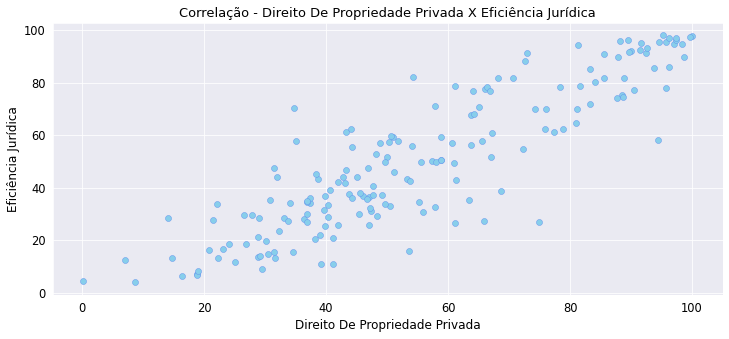

In [110]:
ax = sns.scatterplot(x = df['direitos_de_propriedade'], y = df['eficiencia_juridica'],
                     color = 'skyblue', edgecolor = 'cornflowerblue')
ax.set_xlabel('Direito De Propriedade Privada', fontsize = 12, color = 'k')
ax.set_ylabel('Eficiência Jurídica', fontsize = 12, color = 'k')
ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100], fontsize = 11.5, color = 'k')
ax.set_yticklabels([0, 0, 20, 40, 60, 80, 100], fontsize = 11.5, color = 'k')
ax.set_title('Correlação - Direito De Propriedade Privada X Eficiência Jurídica',
             fontsize = 13, color = 'k')
ax.figure.set_size_inches(12, 5)
plt.show()

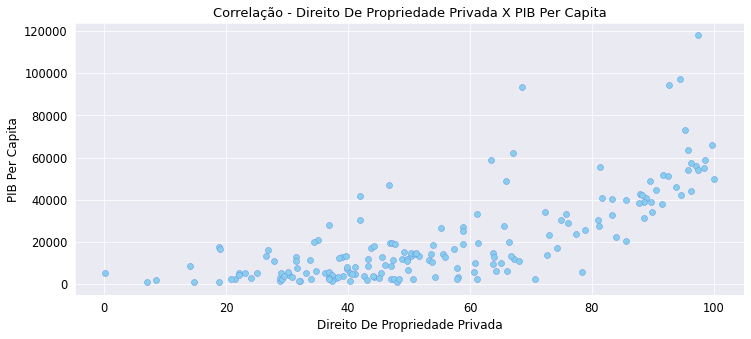

In [111]:
ax = sns.scatterplot(x = df['direitos_de_propriedade'], y = df['pib_per_capita'],
                     color = 'skyblue', edgecolor = 'cornflowerblue')
ax.set_xlabel('Direito De Propriedade Privada', fontsize = 12, color = 'k')
ax.set_ylabel('PIB Per Capita', fontsize = 12, color = 'k')
ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100], fontsize = 11.5, color = 'k')
ax.set_yticklabels([0, 0, 20000, 40000, 60000, 80000, 100000, 120000], fontsize = 11.5, color = 'k')
ax.set_title('Correlação - Direito De Propriedade Privada X PIB Per Capita',
             fontsize = 13, color = 'k')
ax.figure.set_size_inches(12, 5);

In [112]:
df.groupby('regiao').agg({'%_de_desemprego': ['mean', 'median']}).sort_values(
    [('%_de_desemprego', 'mean'), ('%_de_desemprego', 'median')],
ascending = False).round(2)

%_de_desemprego       
                                           mean median
regiao                                                
Américas                                  10.19   9.14
Oriente Médio E Norte Da África            9.94   9.59
África Subsaariana                         8.32   5.99
Europa                                     7.95   6.46
Ásia-Pacífico                              4.93   4.55

In [113]:
df.groupby('regiao').agg({'%_de_inflacao': ['mean', 'median']}).sort_values(
    [('%_de_inflacao', 'mean'), ('%_de_inflacao', 'median')],
ascending = False).round(2)

%_de_inflacao       
                                         mean median
regiao                                              
Américas                                80.74   1.83
África Subsaariana                      20.90   3.48
Oriente Médio E Norte Da África         10.91   2.10
Ásia-Pacífico                            3.28   2.92
Europa                                   1.42   0.85

In [114]:
IQR = df[df['regiao'] == 'Américas']['%_de_inflacao'].quantile(0.75) - df[df['regiao'] == 'Américas']['%_de_inflacao'].quantile(0.25)
print('Limite Superior: ', df[df['regiao'] == 'Américas']['%_de_inflacao'].quantile(0.75) + (IQR * 1.5))
print('\n')
print('Limite Inferior: ', df[df['regiao'] == 'Américas']['%_de_inflacao'].quantile(0.25) - (IQR * 1.5))


Limite Superior:  8.3565


Limite Inferior:  -4.3635


In [115]:
(df[(df['regiao'] == 'Américas') & (df['%_de_inflacao'] < 8.3565)]['%_de_inflacao'].mean()).round(2)

1.46

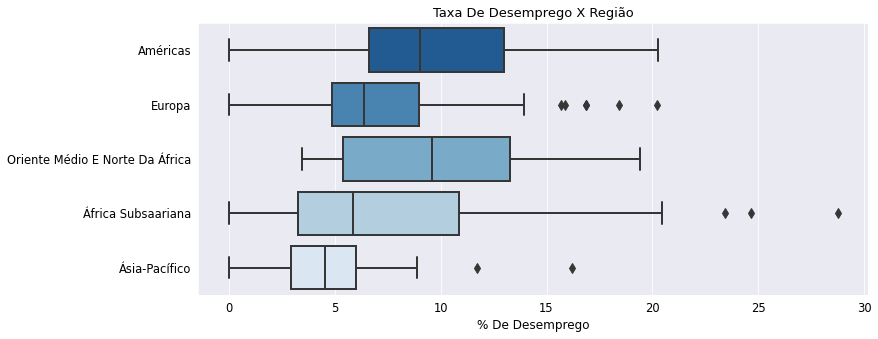

In [116]:
ax = sns.boxplot(data = df.groupby(['regiao', 'pais']).agg({'%_de_desemprego': 'sum'}).reset_index(),
                 x = '%_de_desemprego', y = 'regiao', palette = 'Blues_r', fliersize = 7, linewidth = 2)
ax.set_ylabel('')
ax.set_title('Taxa De Desemprego X Região', fontsize = 13, color = 'k')
ax.set_xlabel('% De Desemprego', fontsize = 12, color = 'k')
ax.set_xticklabels([0, 0, 5, 10, 15, 20, 25, 30], fontsize = 11.5, color = 'k')
ax.set_yticklabels(list(df.groupby(['regiao', 'pais']).agg({'%_de_desemprego': 'sum'}).reset_index(
    
).regiao.unique()), fontsize = 11.5, color = 'k')
ax.figure.set_size_inches(12, 5)
plt.show()

In [117]:
lista_5 = list(df.regiao.unique())
lista_5

['Ásia-Pacífico',
 'Europa',
 'Oriente Médio E Norte Da África',
 'África Subsaariana',
 'Américas']

In [118]:
print(f'{lista_5[0]}: ', df.loc[df['regiao'] == lista_5[0], '%_de_desemprego'].quantile(0.25))

Ásia-Pacífico:  3.165


In [119]:
print(f'{lista_5[0]}: ', df.loc[df['regiao'] == lista_5[0], '%_de_desemprego'].quantile(0.50))

Ásia-Pacífico:  4.55


In [120]:
print(f'{lista_5[0]}: ', df.loc[df['regiao'] == lista_5[0], '%_de_desemprego'].quantile(0.75))

Ásia-Pacífico:  6.01


In [121]:
print(f'{lista_5[1]}: ', df.loc[df['regiao'] == lista_5[1], '%_de_desemprego'].quantile(0.25))

Europa:  4.94


In [122]:
print(f'{lista_5[1]}: ', df.loc[df['regiao'] == lista_5[1], '%_de_desemprego'].quantile(0.50))

Europa:  6.46


In [123]:
print(f'{lista_5[1]}: ', df.loc[df['regiao'] == lista_5[1], '%_de_desemprego'].quantile(0.75))

Europa:  9.08


In [124]:
print(f'{lista_5[2]}: ', df.loc[df['regiao'] == lista_5[2], '%_de_desemprego'].quantile(0.25))

Oriente Médio E Norte Da África:  5.4025


In [125]:
print(f'{lista_5[2]}: ', df.loc[df['regiao'] == lista_5[2], '%_de_desemprego'].quantile(0.50))

Oriente Médio E Norte Da África:  9.59


In [126]:
print(f'{lista_5[2]}: ', df.loc[df['regiao'] == lista_5[2], '%_de_desemprego'].quantile(0.75))

Oriente Médio E Norte Da África:  13.2725


In [127]:
print(f'{lista_5[3]}: ', df.loc[df['regiao'] == lista_5[3], '%_de_desemprego'].quantile(0.25))

África Subsaariana:  3.3449999999999998


In [128]:
print(f'{lista_5[3]}: ', df.loc[df['regiao'] == lista_5[3], '%_de_desemprego'].quantile(0.50))

África Subsaariana:  5.99


In [129]:
print(f'{lista_5[3]}: ', df.loc[df['regiao'] == lista_5[3], '%_de_desemprego'].quantile(0.75))

África Subsaariana:  11.115


In [130]:
print(f'{lista_5[4]}: ', df.loc[df['regiao'] == lista_5[4], '%_de_desemprego'].quantile(0.25))

Américas:  6.86


In [131]:
print(f'{lista_5[4]}: ', df.loc[df['regiao'] == lista_5[4], '%_de_desemprego'].quantile(0.50))

Américas:  9.14


In [132]:
print(f'{lista_5[4]}: ', df.loc[df['regiao'] == lista_5[4], '%_de_desemprego'].quantile(0.75))

Américas:  13.23


In [133]:
df.groupby('pais').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita', ascending = False).reset_index().head(10)

,pais,pib_per_capita
0,Luxembourg,118001.580
1,Singapore,97056.534
2,Ireland,94391.533
3,Qatar,93508.380
4,Switzerland,72873.716
5,Norway,65800.100
6,United States,63415.985
7,Brunei Darussalam,62371.126
8,Denmark,58932.766
9,United Arab Emirates,58753.003


In [134]:
df.groupby('pais').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita', ascending = False
                  ).reset_index().pais.to_numpy()[:10]

array(['Luxembourg', 'Singapore', 'Ireland', 'Qatar', 'Switzerland',
       'Norway', 'United States', 'Brunei Darussalam', 'Denmark',
       'United Arab Emirates'], dtype=object)

In [135]:
df[df.pais.isin(['Luxembourg', 'Singapore', 'Ireland', 'Qatar', 'Switzerland',
       'Norway', 'United States', 'Brunei Darussalam', 'Denmark',
       'United Arab Emirates'])].sort_values('pib_per_capita', ascending = False).avaliacao_final

pais_id
99     Maioritariamente Livre
147    Maioritariamente Livre
78     Maioritariamente Livre
134       Moderadamente Livre
158    Maioritariamente Livre
124    Maioritariamente Livre
175    Maioritariamente Livre
186       Moderadamente Livre
45     Maioritariamente Livre
173    Maioritariamente Livre
Name: avaliacao_final, dtype: object

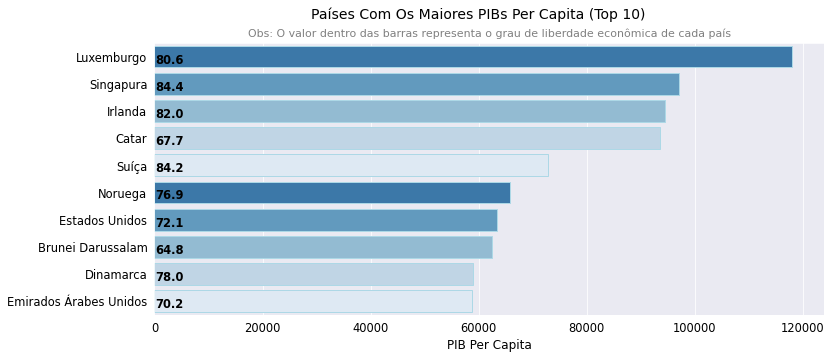

In [136]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
sns.barplot(data = df.groupby('pais').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita', ascending = False
                                                                                      ).reset_index().head(10),
                 x = 'pib_per_capita', y = 'pais', palette = sns.color_palette('Blues_r')[1:], edgecolor = 'lightblue')
ax.set_ylabel('')
ax.set_xlabel('PIB Per Capita', fontsize = 12, color = 'k')
ax.set_yticklabels(['Luxemburgo', 'Singapura', 'Irlanda', 'Catar', 'Suíça',
       'Noruega', 'Estados Unidos', 'Brunei Darussalam', 'Dinamarca',
        'Emirados Árabes Unidos'], fontsize = 11.5, color = 'k')
ax.figure.set_size_inches(12, 5)
ax.set_xticklabels([0, 20000, 40000, 60000, 80000, 100000, 120000], fontsize = 11.5, color = 'k')
for index, value in enumerate(df[df.pais.isin(['Luxembourg', 'Singapore', 'Ireland', 'Qatar', 'Switzerland',
       'Norway', 'United States', 'Brunei Darussalam', 'Denmark',
       'United Arab Emirates'])].sort_values('pib_per_capita', ascending = False).pontuacao_2022):
  plt.text(value + 3, index + .25, str(value), fontsize = 11.5, color = 'k', fontweight = 'bold')
fig.suptitle('Países Com Os Maiores PIBs Per Capita (Top 10)', fontsize = 14, color = 'k')
ax.set_title('Obs: O valor dentro das barras representa o grau de liberdade econômica de cada país', fontsize = 11, color = 'gray')
plt.show()

In [147]:
df[df['pib_per_capita'].isnull() == False].groupby(
    'pais').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita', ascending = False
                                                                                      ).reset_index().tail(10)

,pais,pib_per_capita
171,Chad,1611.004
172,Madagascar,1599.044
173,Liberia,1556.992
174,Mozambique,1276.615
175,Niger,1258.705
176,"Congo, Democratic Republic of the Congo",1106.371
177,Malawi,993.313
178,Central African Republic,979.403
179,Somalia,924.532
180,Burundi,759.861


In [179]:
df[df['pais'].isin(['Sierra Leone', 'Chad', 'Madagascar', 'Liberia', 'Mozambique',
       'Niger', 'Congo, Democratic Republic of the Congo', 'Malawi',
       'Central African Republic', 'Burundi'])].avaliacao_final

pais_id
26                      Reprimido
31                      Reprimido
32                      Reprimido
37                      Reprimido
95                      Reprimido
102    Maioritariamente Não-Livre
103    Maioritariamente Não-Livre
116    Maioritariamente Não-Livre
122    Maioritariamente Não-Livre
146    Maioritariamente Não-Livre
Name: avaliacao_final, dtype: object

In [178]:
df[df['pais'].isin(['Sierra Leone', 'Chad', 'Madagascar', 'Liberia', 'Mozambique',
       'Niger', 'Congo, Democratic Republic of the Congo', 'Malawi',
       'Central African Republic', 'Burundi'])].sort_values('pib_per_capita', ascending = False).pontuacao_2022

pais_id
146    52.0
32     49.8
102    58.9
95     47.9
116    51.3
122    54.9
37     47.6
103    53.0
31     45.7
26     39.4
Name: pontuacao_2022, dtype: float64

In [174]:
df[(df['pontuacao_2022'].isnull() == False) & (df['pib_per_capita'].isnull() == False)].groupby(
    'pais').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita', ascending = False
                                                                                      ).reset_index().tail(10)

,pais,pib_per_capita
166,Sierra Leone,1724.897
167,Chad,1611.004
168,Madagascar,1599.044
169,Liberia,1556.992
170,Mozambique,1276.615
171,Niger,1258.705
172,"Congo, Democratic Republic of the Congo",1106.371
173,Malawi,993.313
174,Central African Republic,979.403
175,Burundi,759.861


In [176]:
df[(df['pontuacao_2022'].isnull() == False) & (df['pib_per_capita'].isnull() == False)].groupby(
    'pais').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita', ascending = False
                                                                                      ).reset_index().tail(10).pais[:10].to_numpy()

array(['Sierra Leone', 'Chad', 'Madagascar', 'Liberia', 'Mozambique',
       'Niger', 'Congo, Democratic Republic of the Congo', 'Malawi',
       'Central African Republic', 'Burundi'], dtype=object)

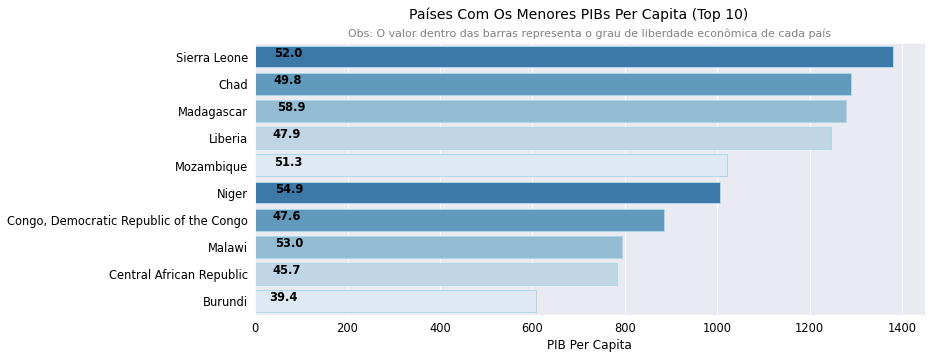

In [181]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
sns.barplot(data = df[(df['pontuacao_2022'].isnull() == False) & (df['pib_per_capita'].isnull() == False)].groupby(
    'pais').agg({'pib_per_capita': 'sum'}).sort_values('pib_per_capita', ascending = False
                                                                                      ).reset_index().tail(10),
                 x = 'pib_per_capita', y = 'pais', palette = sns.color_palette('Blues_r')[1:], edgecolor = 'lightblue')
ax.set_xlabel('PIB Per Capita', fontsize = 12, color = 'k')
ax.set_ylabel('')
ax.set_xticklabels(list(range(0, 1601, 200)), fontsize = 11.5, color = 'k')
ax.set_yticklabels(['Sierra Leone', 'Chad', 'Madagascar', 'Liberia', 'Mozambique',
       'Niger', 'Congo, Democratic Republic of the Congo', 'Malawi',
       'Central African Republic', 'Burundi'], fontsize = 11.5, color = 'k')
for index, value in enumerate(df[df['pais'].isin(['Sierra Leone', 'Chad', 'Madagascar', 'Liberia', 'Mozambique',
       'Niger', 'Congo, Democratic Republic of the Congo', 'Malawi',
       'Central African Republic', 'Burundi'])].sort_values('pib_per_capita', ascending = False).pontuacao_2022):
  plt.text(value, index, str(value), fontsize = 11.5, color = 'k', fontweight = 'bold')
fig.suptitle('Países Com Os Menores PIBs Per Capita (Top 10)', fontsize = 14, color = 'k')
ax.set_title('Obs: O valor dentro das barras representa o grau de liberdade econômica de cada país', fontsize = 11, color = 'gray')
plt.show()

In [185]:
df.drop(columns = 'sem_nome', inplace = True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 183
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pais                             184 non-null    object 
 1   regiao                           184 non-null    object 
 2   ranking_mundial                  177 non-null    float64
 3   ranking_regional                 177 non-null    float64
 4   pontuacao_2022                   177 non-null    float64
 5   direitos_de_propriedade          177 non-null    float64
 6   eficiencia_juridica              177 non-null    float64
 7   integridade_governamental        177 non-null    float64
 8   carga_tributaria                 177 non-null    float64
 9   gastos_do_governo                177 non-null    float64
 10  saude_fiscal                     177 non-null    float64
 11  liberdade_de_negocios            177 non-null    float64
 12  liberdade_de_trabalho 

## ANÁLISE EXPLORATÓRIA DE DADOS FINALIZADA